In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import time
import socket
import struct
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
dd=pd.read_csv(r"iot23_combined_new.csv")
dd.head()

C:\Users\pinis\AppData\Local\Temp\ipykernel_13004\138329725.py:1: DtypeWarning: Columns (9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  dd=pd.read_csv(r"iot23_combined_new.csv")


,Unnamed: 0,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,...,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,0,1.536227e+09,CeqqKl3hyLQmO8LK98,192.168.100.111,17576.0,78.1.220.212,8081.0,tcp,-,0.000003,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
1,1,1.536227e+09,C2oHQWo1EFGH8D9x7,192.168.100.111,17576.0,152.84.7.111,8081.0,tcp,-,0.000002,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
2,2,1.536227e+09,CJLVjs4BByG04mczXc,192.168.100.111,17576.0,173.36.41.67,8081.0,tcp,-,0.000002,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
3,3,1.536227e+09,C0z4uS9AWHDH2s4S7,192.168.100.111,17576.0,87.13.21.104,8081.0,tcp,-,0.000002,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
4,4,1.536227e+09,CxbNVk3liFNUIlqSPi,192.168.100.111,17576.0,99.110.163.140,8081.0,tcp,-,0.000002,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan


In [3]:
dd.shape

(6046623, 22)

In [4]:
dd.isnull().sum()

Unnamed: 0       0
ts               0
uid              0
id.orig_h        0
id.orig_p        0
id.resp_h        0
id.resp_p        0
proto            0
service          0
duration         0
orig_bytes       0
resp_bytes       0
conn_state       0
local_orig       0
local_resp       0
missed_bytes     0
history          0
orig_pkts        0
orig_ip_bytes    0
resp_pkts        0
resp_ip_bytes    0
label            0
dtype: int64

In [5]:
dd.columns

Index(['Unnamed: 0', 'ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h',
       'id.resp_p', 'proto', 'service', 'duration', 'orig_bytes', 'resp_bytes',
       'conn_state', 'local_orig', 'local_resp', 'missed_bytes', 'history',
       'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'label'],
      dtype='object')

In [6]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6046623 entries, 0 to 6046622
Data columns (total 22 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Unnamed: 0     int64  
 1   ts             float64
 2   uid            object 
 3   id.orig_h      object 
 4   id.orig_p      float64
 5   id.resp_h      object 
 6   id.resp_p      float64
 7   proto          object 
 8   service        object 
 9   duration       object 
 10  orig_bytes     object 
 11  resp_bytes     object 
 12  conn_state     object 
 13  local_orig     object 
 14  local_resp     object 
 15  missed_bytes   float64
 16  history        object 
 17  orig_pkts      float64
 18  orig_ip_bytes  float64
 19  resp_pkts      float64
 20  resp_ip_bytes  float64
 21  label          object 
dtypes: float64(8), int64(1), object(13)
memory usage: 1014.9+ MB


# Data Preprocessing

In [7]:
dd['uid'].value_counts()

CeqqKl3hyLQmO8LK98    1
CZyBcQ1QdlSETc7rah    1
CPNHY026myUy5P3dd3    1
ClTgNF2o9Xyk2cU2      1
C0DLFE3U6Q14Tn3kfj    1
                     ..
CurADE3g0pou0Vp6Ba    1
CC5qaO38IrliREtD9b    1
CTFmBT1GivjaR9i9F5    1
CQTUFT1z9koecA2jjh    1
CjD5ve2qwxfFtvd4zl    1
Name: uid, Length: 6046623, dtype: int64

In [8]:
dd['ts'].value_counts()

1.536227e+09    1
1.551386e+09    1
1.551386e+09    1
1.551386e+09    1
1.551386e+09    1
               ..
1.545399e+09    1
1.545399e+09    1
1.545399e+09    1
1.545399e+09    1
1.562165e+09    1
Name: ts, Length: 6046623, dtype: int64

In [9]:
# We can see that uid and ts have unique value so we can remove it
dd=dd.drop(columns=['uid','ts','Unnamed: 0'])

In [10]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6046623 entries, 0 to 6046622
Data columns (total 19 columns):
 #   Column         Dtype  
---  ------         -----  
 0   id.orig_h      object 
 1   id.orig_p      float64
 2   id.resp_h      object 
 3   id.resp_p      float64
 4   proto          object 
 5   service        object 
 6   duration       object 
 7   orig_bytes     object 
 8   resp_bytes     object 
 9   conn_state     object 
 10  local_orig     object 
 11  local_resp     object 
 12  missed_bytes   float64
 13  history        object 
 14  orig_pkts      float64
 15  orig_ip_bytes  float64
 16  resp_pkts      float64
 17  resp_ip_bytes  float64
 18  label          object 
dtypes: float64(7), object(12)
memory usage: 876.5+ MB


In [11]:
dd['id.orig_h'].value_counts()

192.168.1.197      1004274
192.168.1.198       999940
192.168.100.111     999711
192.168.1.195       522846
192.168.1.194       499990
                    ...   
120.80.201.14            1
84.63.59.168             1
179.86.71.177            1
123.60.157.103           1
62.55.151.88             1
Name: id.orig_h, Length: 1494, dtype: int64

Converting orginator IP address string to its corresponding integer representation

In [12]:
ip_col_name = "id.orig_h"

# define a function to convert IP addresses to integers
def ip_to_int(ip):
    try:
        return struct.unpack("!I", socket.inet_aton(ip))[0]
    except socket.error:
        return None

dd[ip_col_name] = dd[ip_col_name].apply(ip_to_int)

dd.to_csv("iot23_combined_new.csv", index=False)

In [13]:
dd['id.orig_p'].value_counts()

63420.0    499950
36097.0    499344
5526.0     498763
24159.0    250422
30535.0    249244
            ...  
29137.0         2
13913.0         2
32589.0         2
9595.0          1
13670.0         1
Name: id.orig_p, Length: 65536, dtype: int64

In [14]:
dd['id.resp_h'].value_counts()

162.248.88.215     499142
123.59.209.185      14260
185.244.25.235       6768
178.128.185.250      4112
128.185.250.50       4110
                    ...  
194.160.193.55          1
17.241.56.25            1
217.253.175.99          1
19.227.115.242          1
18.195.134.106          1
Name: id.resp_h, Length: 4979000, dtype: int64

Converting respondent IP address string to its corresponding integer representation

In [15]:
ip_col_name = "id.resp_h"

def ip_to_int(ip):
    try:
        return struct.unpack("!I", socket.inet_aton(ip))[0]
    except socket.error:
        return None

dd[ip_col_name] = dd[ip_col_name].apply(ip_to_int)
dd.to_csv("iot23_combined_new.csv", index=False)

In [16]:
dd['id.resp_p'].value_counts()

23.0       1873317
37215.0    1313015
8081.0      749819
52869.0     531401
22.0        499940
            ...   
14645.0          1
6901.0           1
51419.0          1
49824.0          1
56527.0          1
Name: id.resp_p, Length: 697, dtype: int64

In [17]:
dd['proto'].value_counts()

tcp     6026584
udp       18429
icmp       1610
Name: proto, dtype: int64

Text(0, 0.5, 'Count')

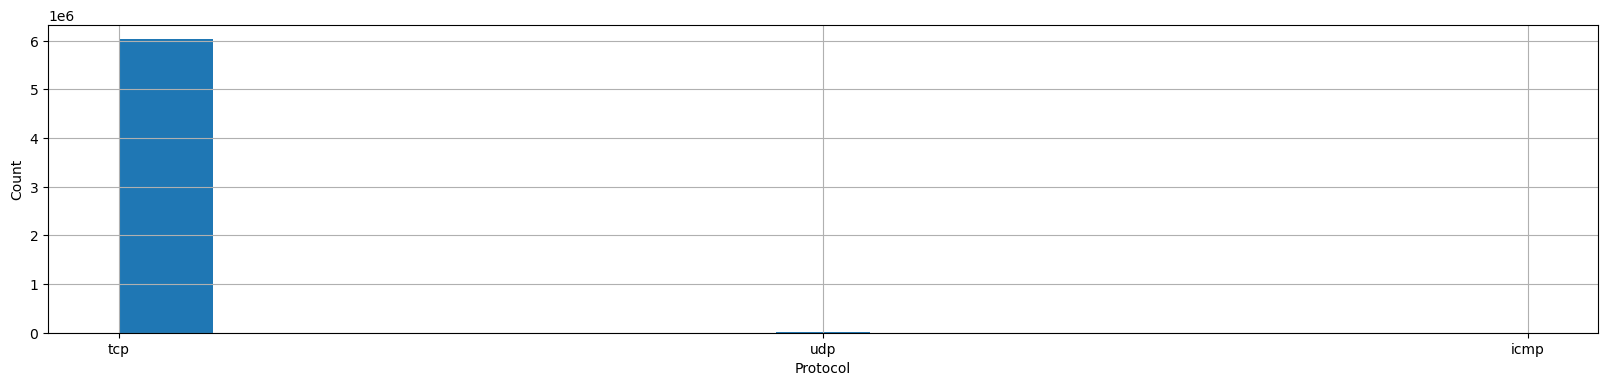

In [18]:
dd.proto.hist(bins=15,figsize=(20,4))
plt.xlabel("Protocol")
plt.ylabel("Count")

In [19]:
dd['service'].value_counts()

-       6038628
dns        5723
irc        1655
http        344
dhcp        176
ssl          95
ssh           2
Name: service, dtype: int64

In [20]:
dd['service']=dd['service'].str.replace('-','nil')

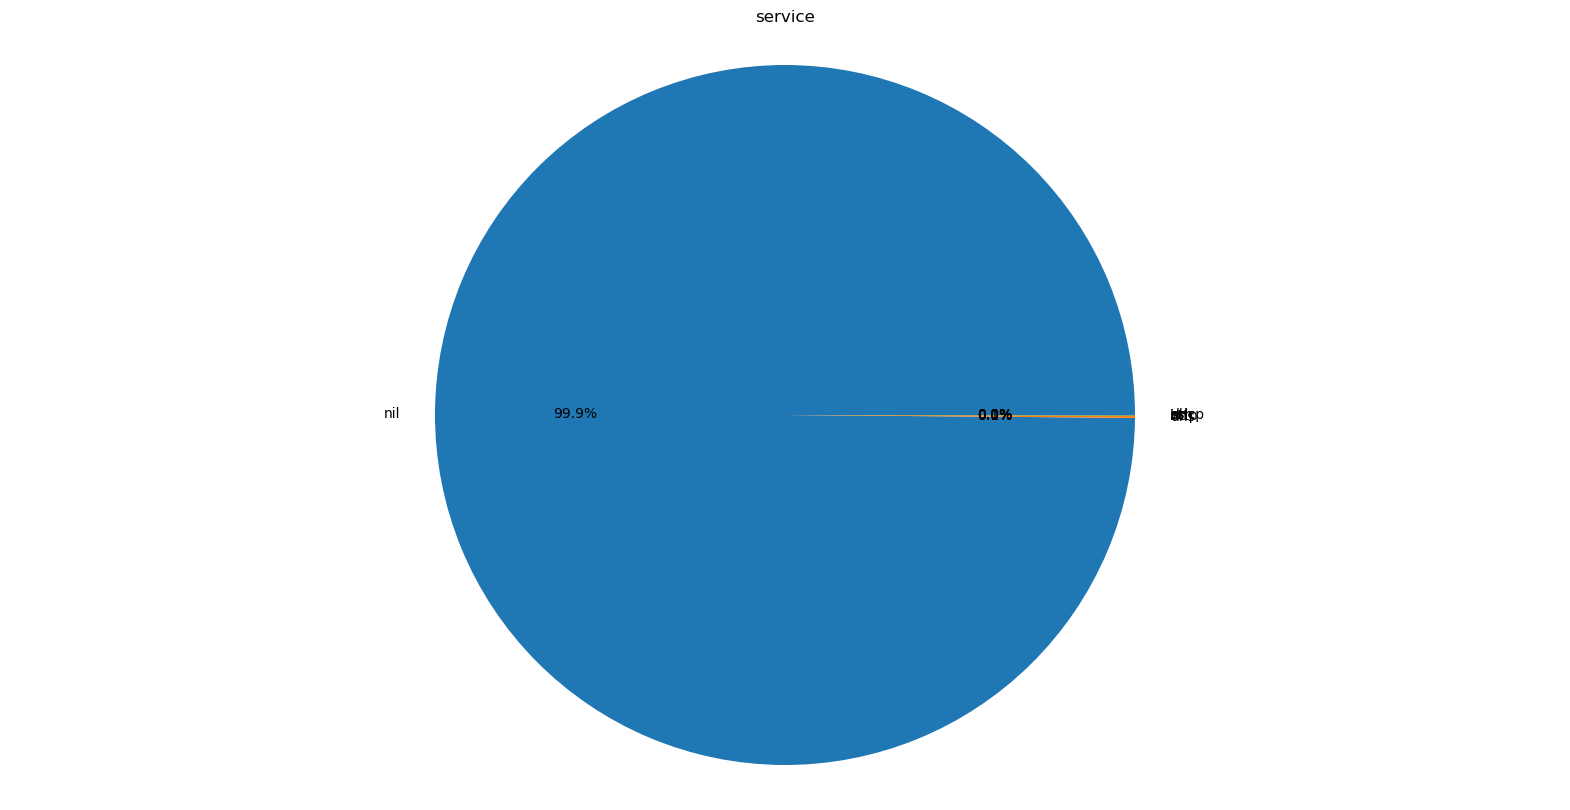

In [21]:
column_name = "service"

value_counts = dd[column_name].value_counts()

plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
plt.title(column_name)
plt.axis('equal')
plt.show()

In [22]:
dd_filtered = dd[dd['service'] != 'nil']
counts = dd_filtered['service'].value_counts()

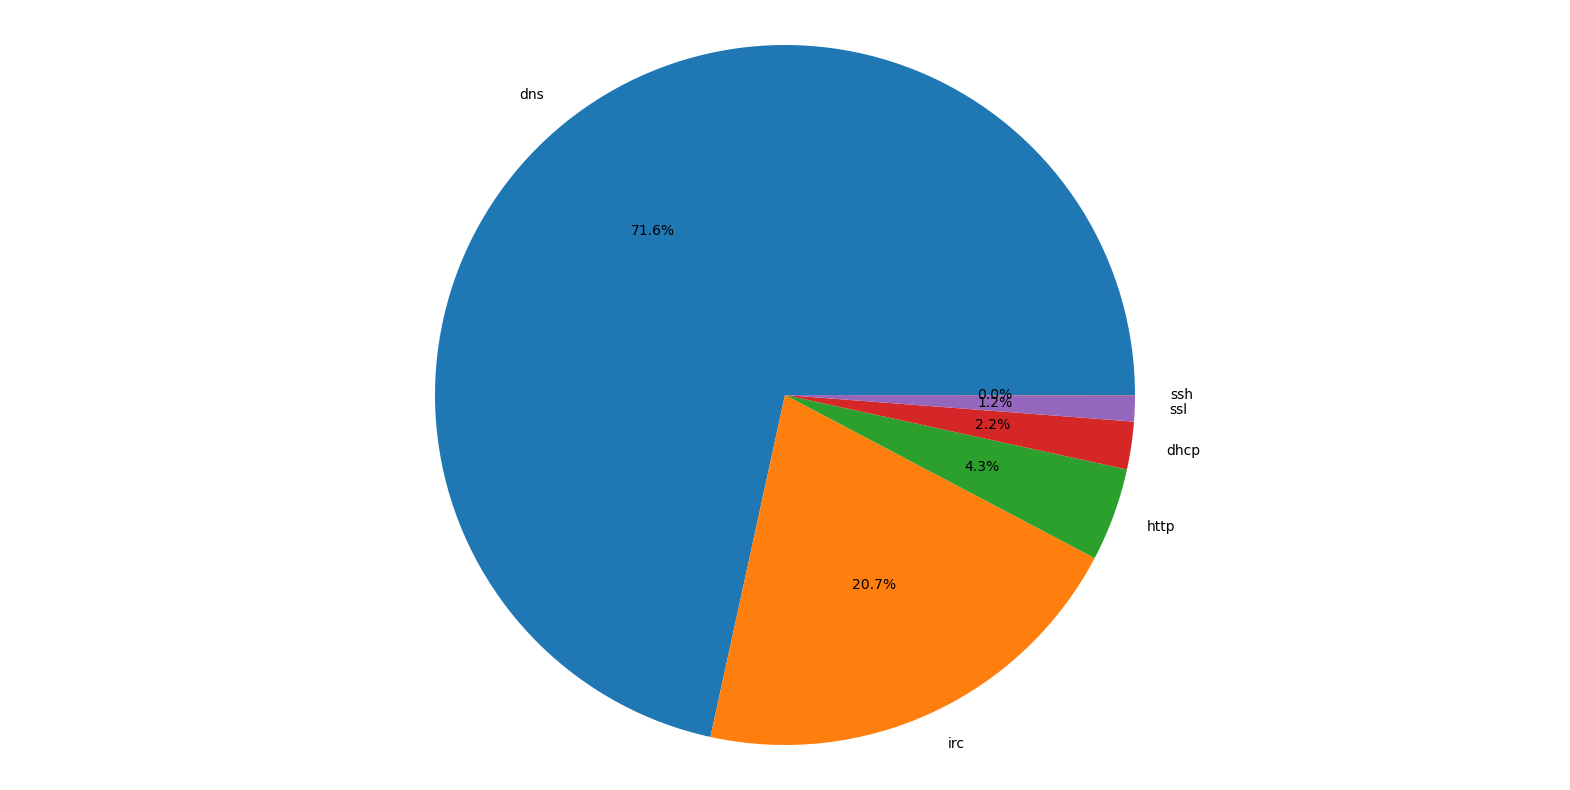

In [23]:
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [24]:
dd['duration'].value_counts()

-                     3773928
2e-06                  768243
5e-06                  345788
6e-06                  172466
1e-06                  144053
                       ...   
3.127677                    1
3.127934                    1
3.128015                    1
3.128270                    1
44.242222999999996          1
Name: duration, Length: 65903, dtype: int64

In [25]:
dd['duration']=dd['duration'].str.replace('-','0')

In [26]:
dd['orig_bytes'].value_counts()

-        3773928
0        1964865
0         289670
48          6121
29          1463
          ...   
58404          1
5652           1
128            1
9995           1
72.0           1
Name: orig_bytes, Length: 461, dtype: int64

In [27]:
dd['orig_bytes']=dd['orig_bytes'].str.replace('-','0')

In [28]:
dd['resp_bytes'].value_counts()

-           3773928
0           1965628
0            292576
48             6127
45             2808
             ...   
29096             1
149980            1
152039            1
139570            1
464134.0          1
Name: resp_bytes, Length: 388, dtype: int64

In [29]:
dd['resp_bytes']=dd['resp_bytes'].str.replace('-','0')

In [30]:
dd.fillna(0,inplace=True)

In [31]:
dd['duration']=dd['duration'].astype('float')
dd['orig_bytes']=dd['orig_bytes'].astype('float')
dd['resp_bytes']=dd['resp_bytes'].astype('float')

In [32]:
dd['conn_state'].value_counts()

S0        5514038
OTH        515339
SF          11653
REJ          2488
S3           2484
RSTR          334
SH            105
RSTO          100
RSTOS0         44
S1             16
SHR            14
S2              6
RSTRH           2
Name: conn_state, dtype: int64

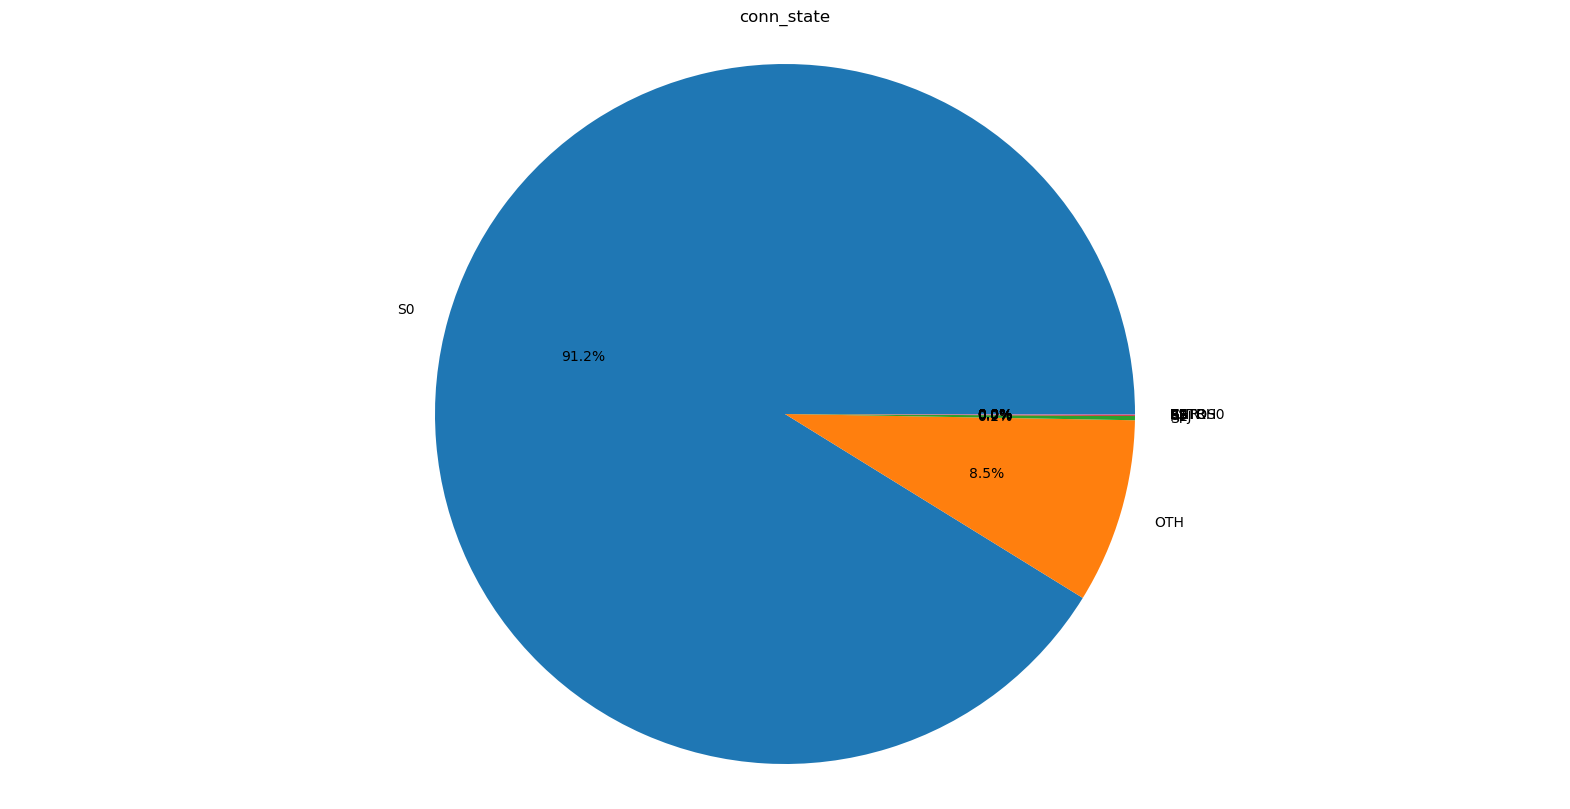

In [33]:
column_name = "conn_state"

value_counts = dd[column_name].value_counts()

plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
plt.title(column_name)
plt.axis('equal')
plt.show()

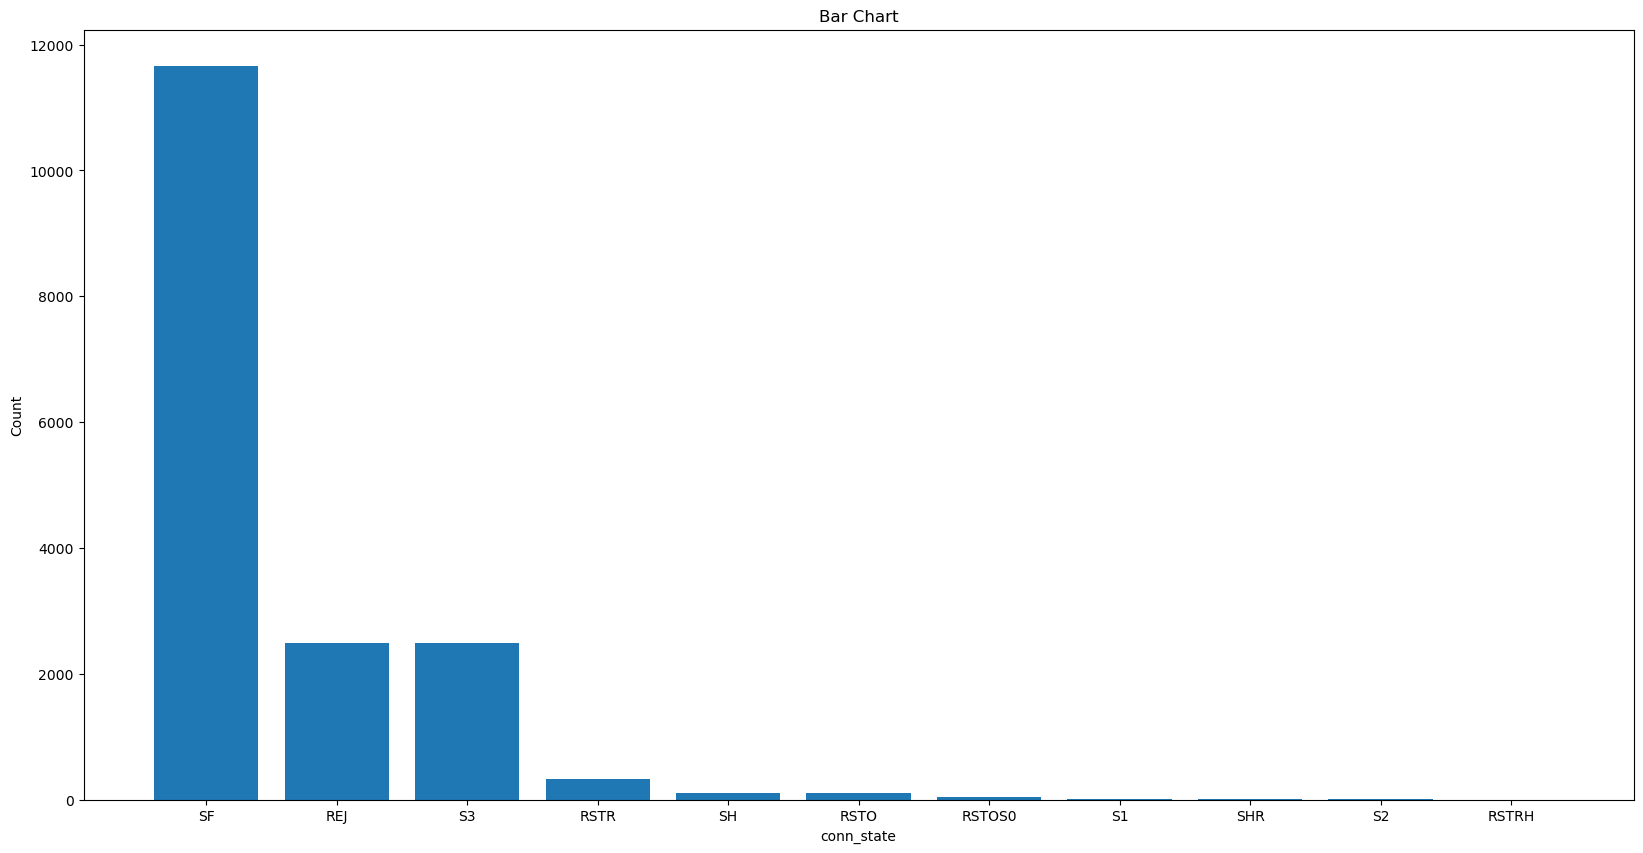

In [34]:
filtered_dd = dd[~dd['conn_state'].isin(['S0', 'OTH'])]

counts = filtered_dd['conn_state'].value_counts()

plt.bar(counts.index, counts.values, width=0.8)
plt.xlabel('conn_state')
plt.ylabel('Count')
plt.title('Bar Chart')
plt.show()

In [35]:
dd['local_orig'].value_counts()

-    6046623
Name: local_orig, dtype: int64

In [36]:
dd['local_resp'].value_counts()

-    6046623
Name: local_resp, dtype: int64

In [37]:
# we can remove local_orig, loacl_resp which is empty column but entered '_'
dd=dd.drop(columns=['local_orig','local_resp'])

In [38]:
dd['missed_bytes'].value_counts()

0.0        6046562
2896.0          12
1448.0          10
5792.0           6
10136.0          5
1539.0           4
2920.0           3
4344.0           3
2472.0           2
13032.0          2
7240.0           2
5390.0           1
1460.0           1
1579.0           1
4500.0           1
15928.0          1
20272.0          1
8688.0           1
17376.0          1
11584.0          1
1582.0           1
4006.0           1
7363.0           1
Name: missed_bytes, dtype: int64

In [39]:
dd['history'].value_counts()

S            5506567
C             513394
Dd             10953
D               7466
Sr              2485
              ...   
ShAdr              1
ShAdDafR           1
ShAdDafr           1
ShADda             1
ShDadAttt          1
Name: history, Length: 140, dtype: int64

In [40]:
dd=dd.drop(columns=['history'])

In [41]:
dd['orig_pkts'].value_counts()

1.0       3271518
2.0       1587473
0.0        513715
6.0        285803
3.0        254487
           ...   
68.0            1
166.0           1
71.0            1
5989.0          1
2702.0          1
Name: orig_pkts, Length: 181, dtype: int64

In [42]:
dd['orig_ip_bytes'].value_counts()

40.0        2995674
80.0        1333415
0.0          513715
60.0         260763
180.0        253891
             ...   
552.0             1
2120.0            1
2248.0            1
26944.0           1
466302.0          1
Name: orig_ip_bytes, Length: 712, dtype: int64

In [43]:
dd['resp_pkts'].value_counts()

0.0       6029423
1.0         11730
6.0          1917
2.0          1833
7.0           666
           ...   
90.0            1
118.0           1
101.0           1
94.0            1
3137.0          1
Name: resp_pkts, Length: 128, dtype: int64

In [44]:
dd['resp_ip_bytes'].value_counts()

0.0          6029423
76.0            6127
73.0            2808
40.0            1581
80.0             911
              ...   
140480.0           1
74090.0            1
74142.0            1
56181.0            1
1075416.0          1
Name: resp_ip_bytes, Length: 472, dtype: int64

In [45]:
dd['label'].value_counts()

PartOfAHorizontalPortScan     3389036
Okiru                         1313012
Benign                         688812
DDoS                           638506
C&C                             15286
C&C-HeartBeat                    1332
Attack                            538
C&C-FileDownload                   46
C&C-Torii                          30
FileDownload                       13
C&C-HeartBeat-FileDownload          8
Okiru-Attack                        3
C&C-Mirai                           1
Name: label, dtype: int64

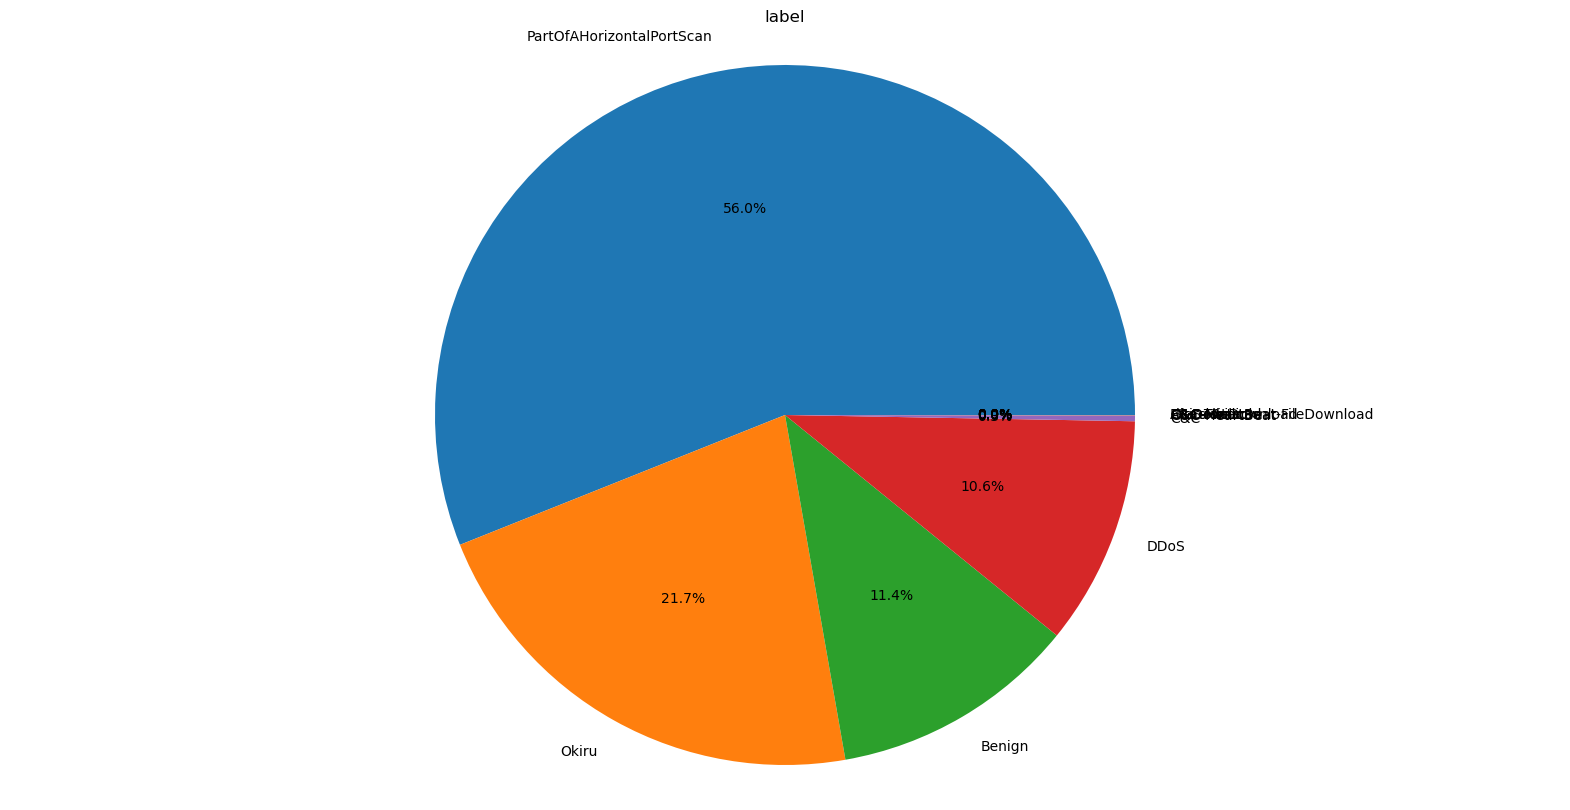

In [46]:
column_name = "label"

value_counts = dd[column_name].value_counts()

plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
plt.title(column_name)
plt.axis('equal')
plt.show()

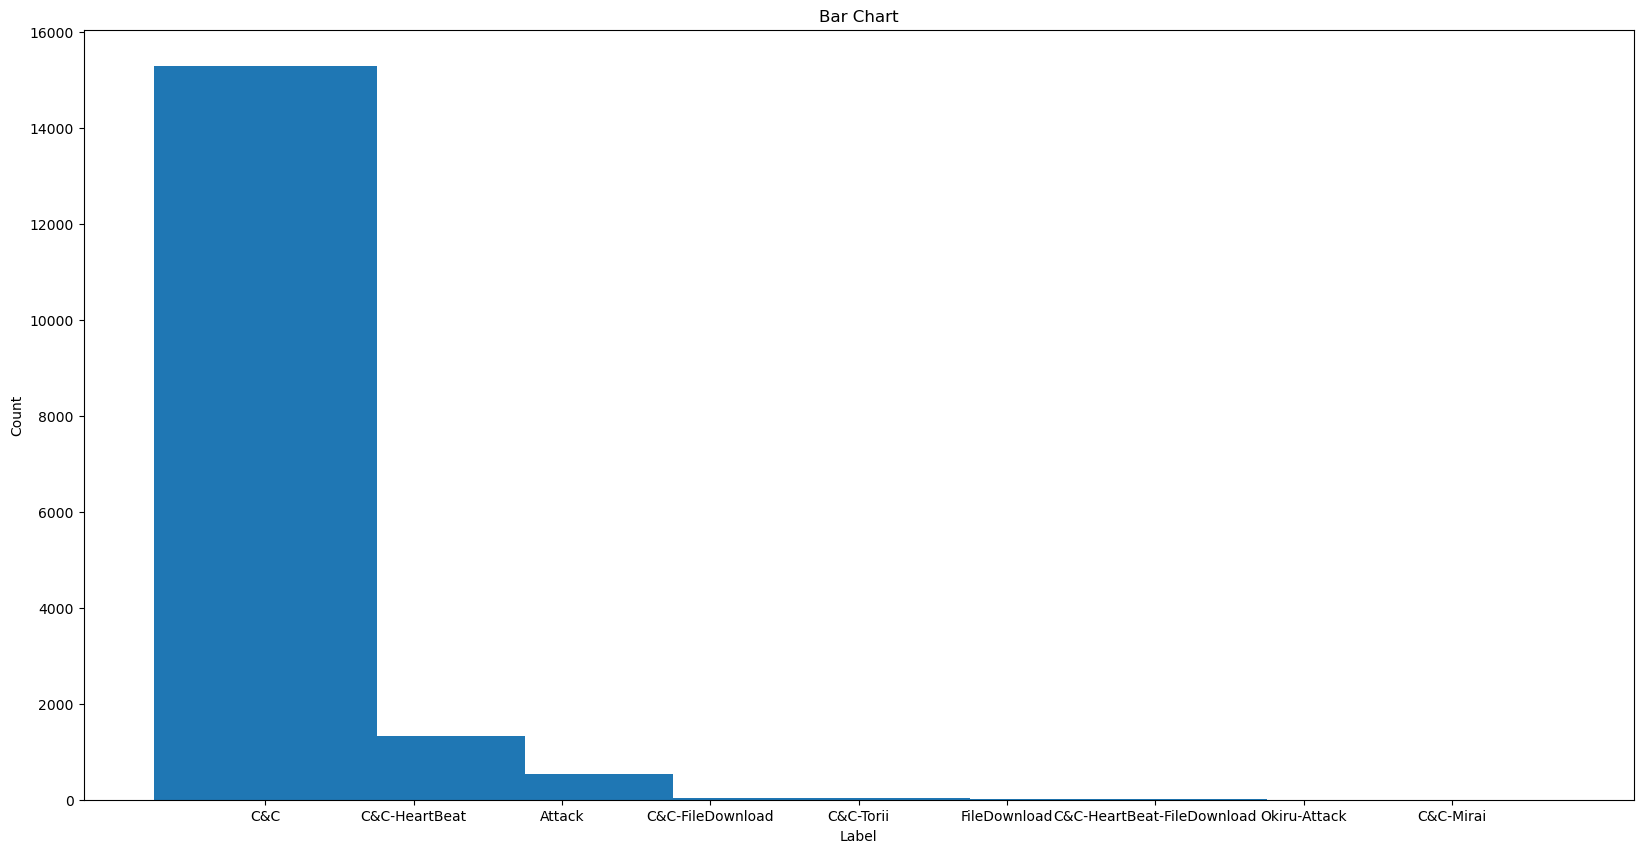

In [47]:
filtered_dd = dd[~dd['label'].isin(['PartOfAHorizontalPortScan', 'Okiru', 'Benign', 'DDoS'])]

counts = filtered_dd['label'].value_counts()
plt.bar(counts.index, counts.values, width=1.5)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Bar Chart')
plt.show()

In [48]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6046623 entries, 0 to 6046622
Data columns (total 16 columns):
 #   Column         Dtype  
---  ------         -----  
 0   id.orig_h      float64
 1   id.orig_p      float64
 2   id.resp_h      float64
 3   id.resp_p      float64
 4   proto          object 
 5   service        object 
 6   duration       float64
 7   orig_bytes     float64
 8   resp_bytes     float64
 9   conn_state     object 
 10  missed_bytes   float64
 11  orig_pkts      float64
 12  orig_ip_bytes  float64
 13  resp_pkts      float64
 14  resp_ip_bytes  float64
 15  label          object 
dtypes: float64(12), object(4)
memory usage: 738.1+ MB


# Label Encoding

In [49]:
pmap = {'tcp':0,'udp':1,'icmp':2}
dd['proto']=dd['proto'].map(pmap)

In [50]:
pmap = {'nil':0,'dns':1,'irc':2,'http':3,'dhcp':4,'ssl':5,'ssh':6}
dd['service']=dd['service'].map(pmap)

In [51]:
pmap = {'S0':0,'OTH':1,'SF':2,'REJ':3,'S3':4,'RSTR':5,'SH':6,'RSTO':7,'RSTOS0':8,'S1':9,'SHR':10,'S2':11,'RSTRH':12} 
dd['conn_state']=dd['conn_state'].map(pmap)

In [52]:
pmap = {'PartOfAHorizontalPortScan':0,'Okiru':1,'Benign':2,'DDoS':3,'C&C':4,'C&C-HeartBeat':5,'Attack':6,'C&C-FileDownload':7,'C&C-Torii':8,'FileDownload':9,'C&C-HeartBeat-FileDownload':10,'Okiru-Attack':11,'C&C-Mirai':12} 
dd['label']=dd['label'].map(pmap)

In [53]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6046623 entries, 0 to 6046622
Data columns (total 16 columns):
 #   Column         Dtype  
---  ------         -----  
 0   id.orig_h      float64
 1   id.orig_p      float64
 2   id.resp_h      float64
 3   id.resp_p      float64
 4   proto          int64  
 5   service        int64  
 6   duration       float64
 7   orig_bytes     float64
 8   resp_bytes     float64
 9   conn_state     int64  
 10  missed_bytes   float64
 11  orig_pkts      float64
 12  orig_ip_bytes  float64
 13  resp_pkts      float64
 14  resp_ip_bytes  float64
 15  label          int64  
dtypes: float64(12), int64(4)
memory usage: 738.1 MB


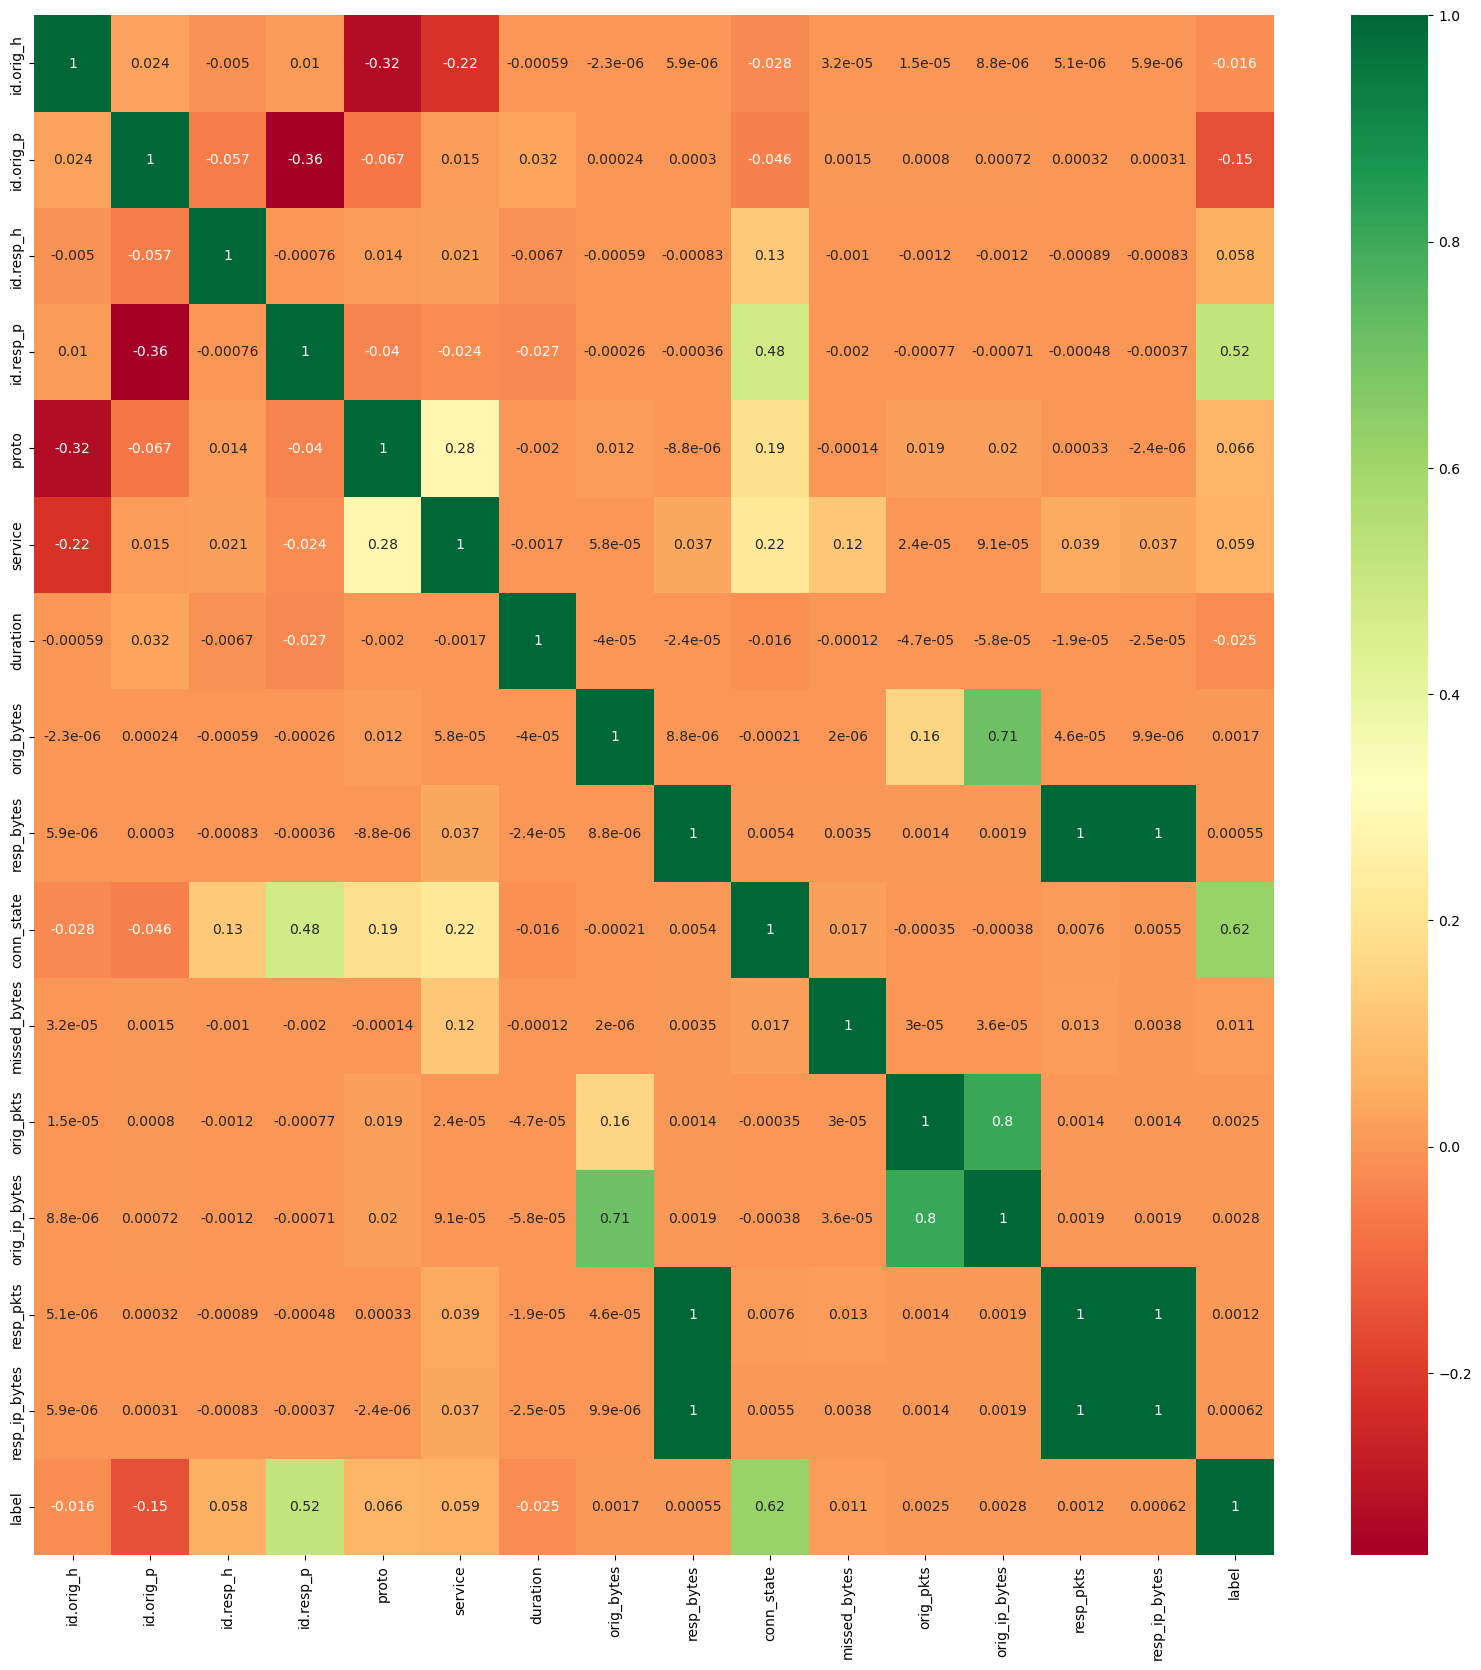

In [54]:
corrmat = dd.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dd[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [55]:
dd=dd.drop(columns=['resp_bytes','resp_pkts','orig_pkts'])

In [56]:
X = dd.drop(['label'], axis=1)
y = dd[['label']]

In [57]:
# Split test and train data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(4837298, 12) (1209325, 12)
(4837298, 1) (1209325, 1)


In [58]:
# Build the decision tree
df = DecisionTreeClassifier()
df.fit(X_train, y_train)

# Evaluate the decision tree
y_pred = df.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

importances = df.feature_importances_

feature_names = list(X.columns)

feature_importances = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

for feature, importance in feature_importances:
    print(f"{feature}: {importance}")


id.resp_p: 0.566798757069691
orig_ip_bytes: 0.21176640304914773
duration: 0.09672401734231656
id.orig_h: 0.08949841083786333
id.orig_p: 0.03164043148356572
proto: 0.002393656706477776
service: 0.00048697127057023147
conn_state: 0.00039943224096207795
id.resp_h: 0.000253361317742758
resp_ip_bytes: 1.9623129621032012e-05
orig_bytes: 1.8935552041690173e-05
missed_bytes: 0.0


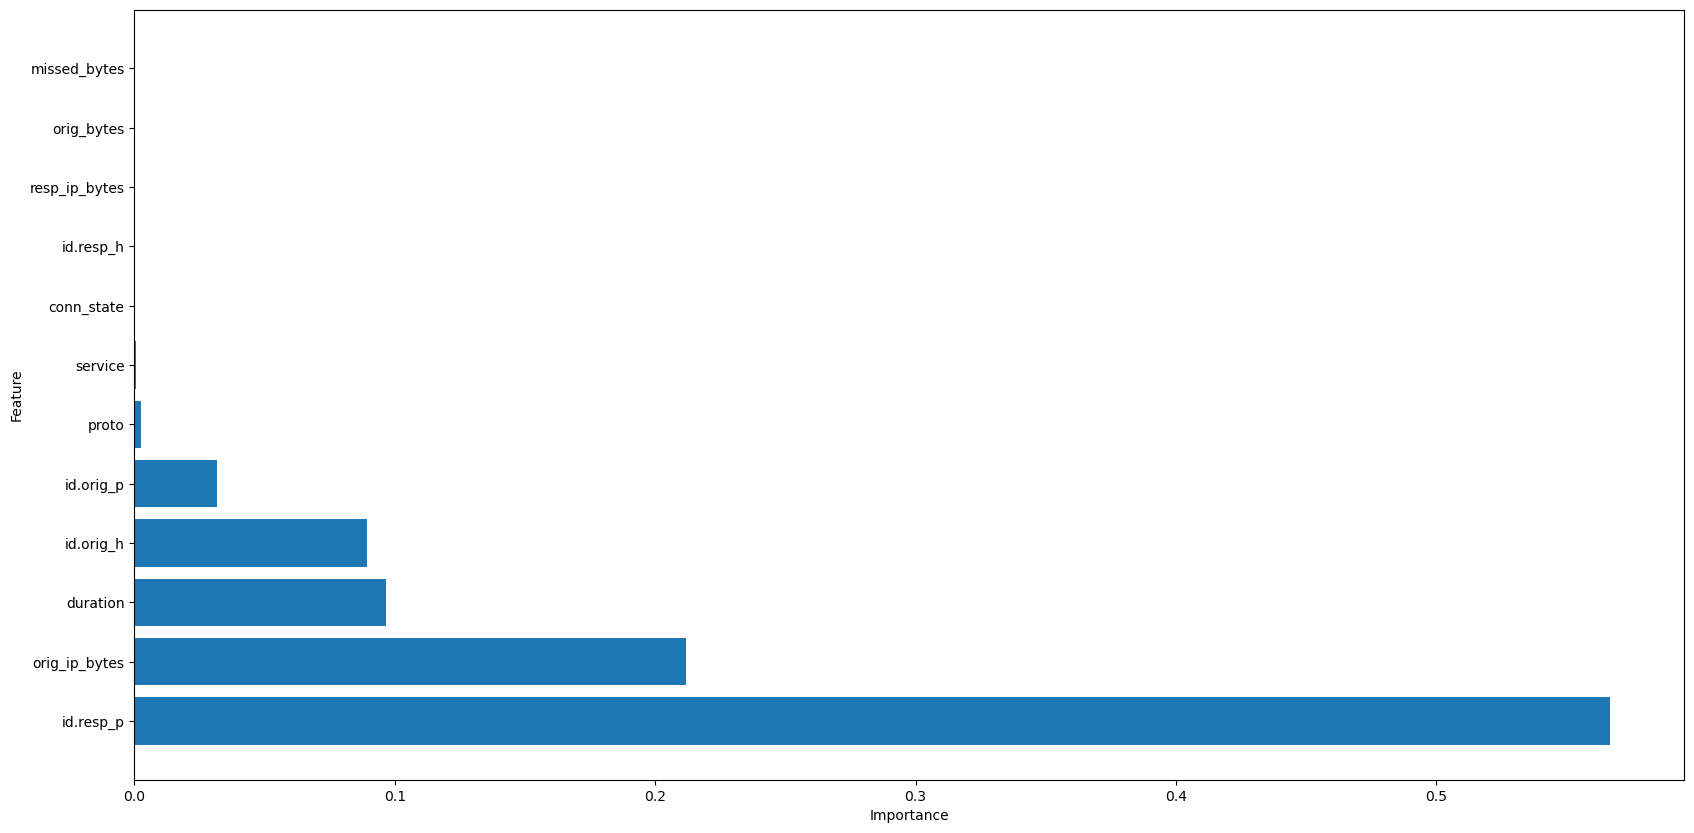

In [59]:
# Plot the feature importances as a horizontal bar chart
plt.barh(range(len(feature_importances)), [val[1] for val in feature_importances], align='center')
plt.yticks(range(len(feature_importances)), [val[0] for val in feature_importances])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [61]:
print(y_pred)

[0 2 3 ... 0 0 0]


In [62]:
unique, counts = np.unique(y_pred, return_counts=True)
print(dict(zip(unique, counts)))

{0: 679107, 1: 261486, 2: 137982, 3: 127299, 4: 3051, 5: 264, 6: 121, 7: 5, 8: 6, 9: 2, 10: 2}


In [63]:
y_pred[0:20]

array([0, 2, 3, 0, 0, 0, 2, 0, 3, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 1],
      dtype=int64)

In [64]:
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 6.532569822008145e-05


In [65]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

RMSE: 0.008082431454709743


In [66]:
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MAE: 2.0672689310152358e-05


In [67]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9999892502015587


In [68]:
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.9999334635164437
Recall: 0.9696608555089139
F1-score: 0.9817668540343886


Text(0.5, 1.0, 'Confusion Matrix')

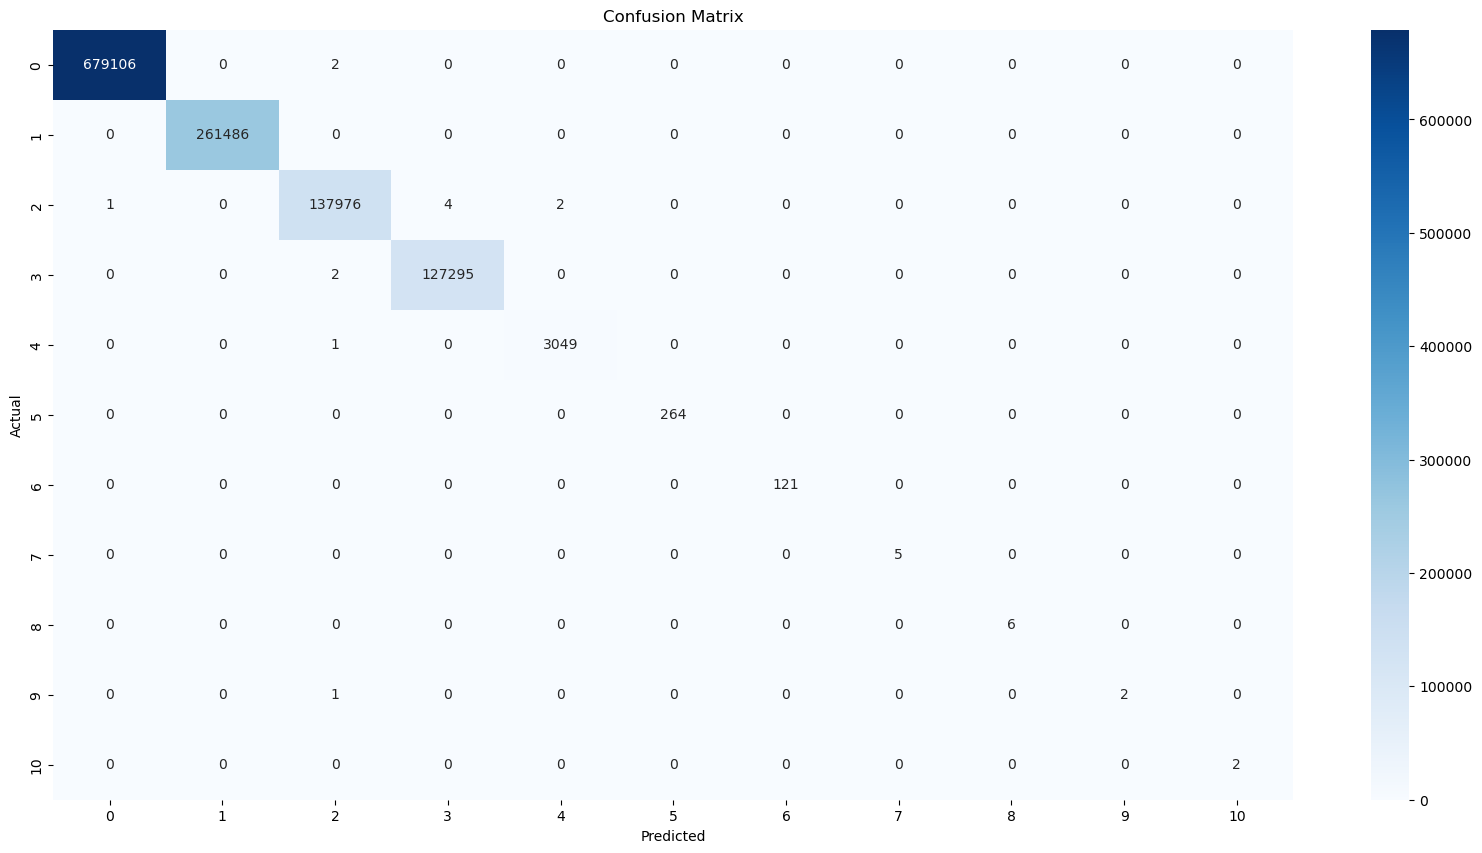

In [69]:
cm = confusion_matrix(y_test, y_pred)

# heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')